<a href="https://colab.research.google.com/github/BrajanNieto/GA-TSP-Comparison/blob/main/IA_Fundamentals_GeneticAlgorithm_TSP_BrajanNieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IA Fundamentals - Genetic Algorithms in TSP**

---

This script contains the implementation and experimental analysis of Genetic Algorithms applied to the Traveling Salesman Problem (TSP). It focuses on evaluating and comparing the performance of:



*   **Selection Methods:** Roulette Wheel, Rank-based, Fitness Scaling, and Tournament Selection.
*   **Population Initialization Methods:** Random, Heuristic, and Hybrid Initialization.

**Professor:**  
PhD. Machaca Vicente Arceda  
[vicente.machaca.a@gmail.com](mailto:vicente.machaca.a@gmail.com)

**Autor:**  
Bach. Brajan Esteban Nieto Espinoza  
[brajan.nieto@utec.edu.pe](mailto:brajan.nieto@utec.edu.pe)

<img src="https://pregrado.utec.edu.pe/sites/default/files/logo-utec-h_0_0.svg" width="190" alt="Logo UTEC" loading="lazy" typeof="foaf:Image">

---

## The Traveling Salesman Problem (TSP)
Is a classic optimization problem where the goal is to find the shortest possible route that visits a set of cities once and returns to the starting point. It is widely used to test optimization algorithms.

### Libraries

In [51]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
import random

### Plotting
the process involves visualizing data or results in a graphical format.

In [52]:
def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    #plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

### Create cities and distances

In [53]:
N = 5  # Number of cities
pop_size = 8 # Population size for optimization
cities = np.random.rand(N, 2)  # Random 2D coordinates for cities
distances = squareform(pdist(cities, 'euclidean'))  # Pairwise distance matrix

print(f"{N} cities coordinates")
print(cities)  # Print city coordinates
print(f"\n Distance matrix between {N} cities")
print(distances)  # Print distance matrix


5 cities coordinates
[[0.10734405 0.91586434]
 [0.07872363 0.09789189]
 [0.05099571 0.75430559]
 [0.79925631 0.04641648]
 [0.25056255 0.60468435]]

 Distance matrix between 5 cities
[[0.         0.818473   0.17110337 1.11116252 0.34255587]
 [0.818473   0.         0.65699907 0.72236906 0.53513289]
 [0.17110337 0.65699907 0.         1.03004899 0.24942622]
 [1.11116252 0.72236906 1.03004899 0.         0.78276935]
 [0.34255587 0.53513289 0.24942622 0.78276935 0.        ]]


### Fitness function

In [54]:
def fitness(solution): # For TSP problem
  distance = 0
  for i in range(len(solution)-1):
    distance += distances[solution[i]][solution[i+1]]
  return distance


#Population initialization

[[3, 2, 0, 4, 1], [3, 0, 4, 1, 2], [4, 1, 3, 0, 2], [0, 3, 1, 4, 2], [0, 1, 3, 4, 2], [4, 1, 2, 3, 0], [1, 0, 2, 4, 3], [4, 2, 3, 0, 1]] 




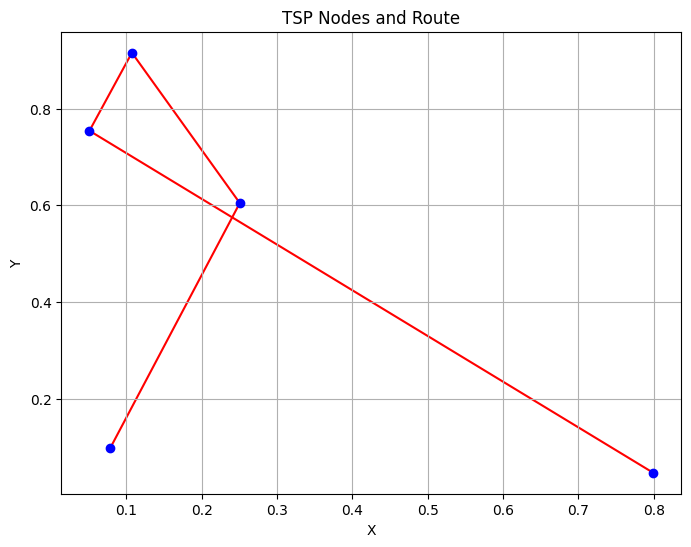

2.0788411231345485


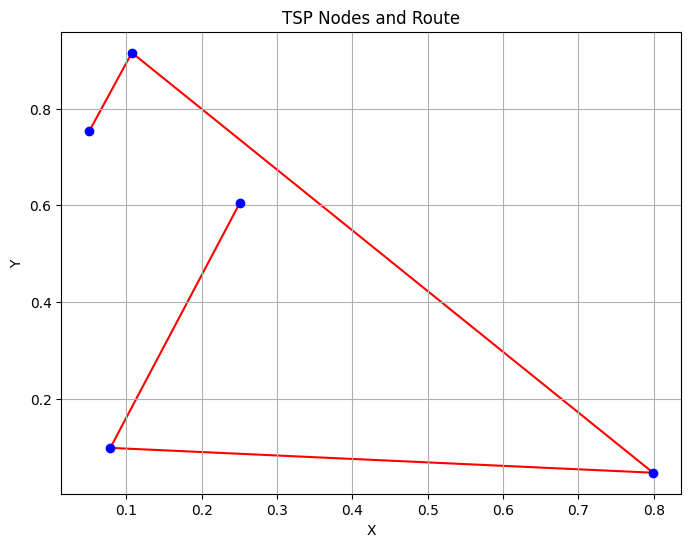

2.5397678423134145


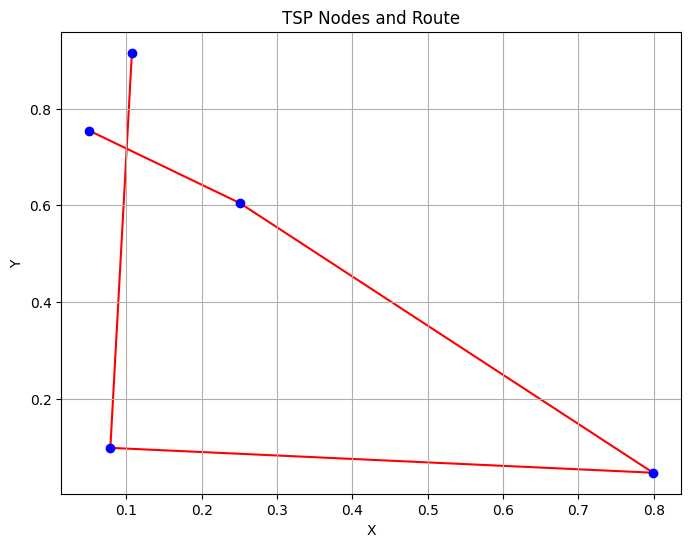

In [55]:
# Create initial population Random
def create_initial_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        individual = list(np.random.permutation(num_cities)) # create a random solution
        population.append(individual)
    return population
#Print population and graph
population = create_initial_population(pop_size, N)
print(population, "\n\n")
plot_tsp(cities, population[0])
print(fitness(population[0]))
plot_tsp(cities, population[2])
print(fitness(population[2]))
plot_tsp(cities, population[4])

[[3, 1, 4, 2, 0], [3, 4, 0, 2, 1], [3, 1, 4, 2, 0], [3, 1, 4, 2, 0], [3, 4, 0, 2, 1], [1, 2, 0, 4, 3], [3, 4, 0, 2, 1], [3, 1, 4, 2, 0]] 




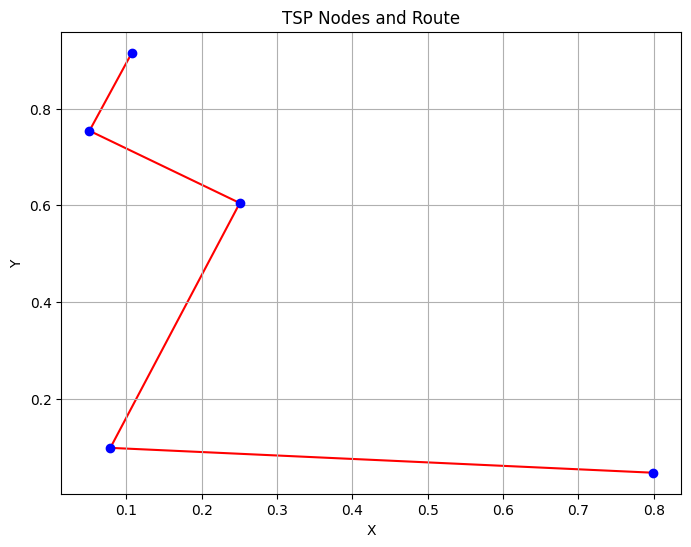

1.6780315419522702


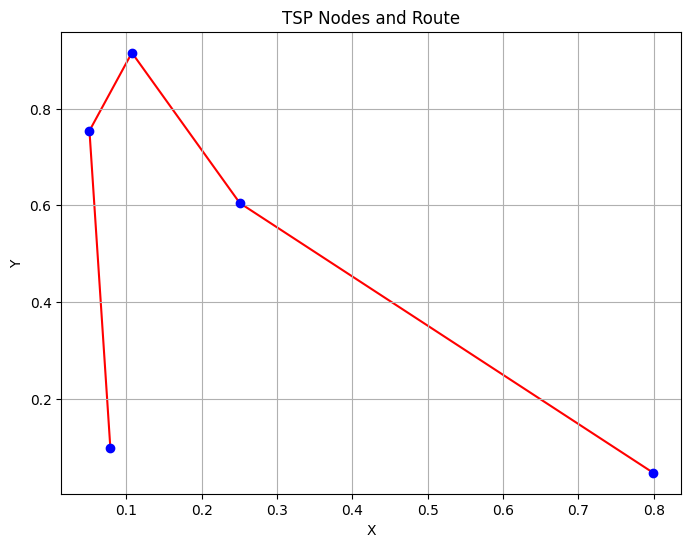

1.9534276672323476


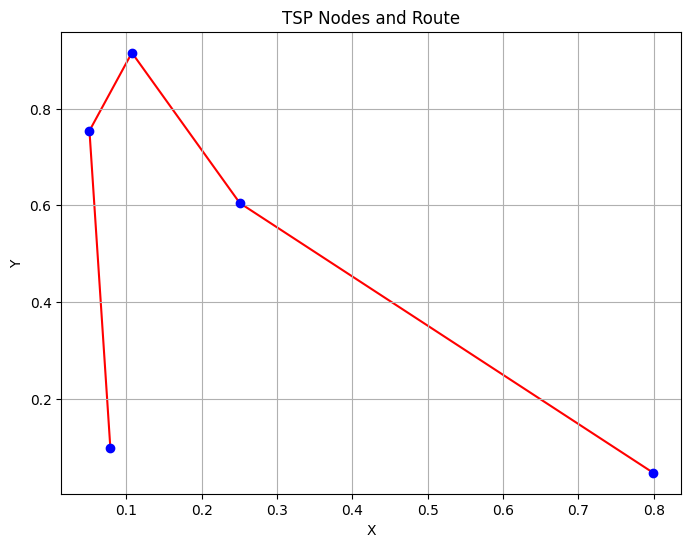

1.9534276672323476


In [56]:
# Hill Climbing algorithm to improve an initial solution iteratively
def hill_climbing(initial_solution, max_iterations=1000):
    current_solution = initial_solution.copy()
    current_fitness = fitness(current_solution)
    for _ in range(max_iterations):
        # Neighbor generation
        neighbor = current_solution.copy()
        i, j = np.random.choice(len(neighbor), size=2, replace=False)
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
        neighbor_fitness = fitness(neighbor)
        # Acceptance criteria
        if neighbor_fitness < current_fitness:
            current_solution = neighbor
            current_fitness = neighbor_fitness
    return current_solution

# Generate population using Hill Climbing
def create_initial_population_hill_climbing(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        # Generate a random initial sol
        initial_solution = list(np.random.permutation(num_cities))
        # Improve the initial solution using Hill Climbing
        improved_solution = hill_climbing(initial_solution)
        population.append(improved_solution)
    return population

#Visualize and evaluate a few solutions
populationhc = create_initial_population_hill_climbing(pop_size, N)
print(populationhc, "\n\n")
plot_tsp(cities, populationhc[0])
print(fitness(populationhc[0]))
plot_tsp(cities, populationhc[4])
print(fitness(populationhc[4]))
plot_tsp(cities, populationhc[6])
print(fitness(populationhc[6]))

[[3, 1, 4, 2, 0], [1, 2, 0, 4, 3], [3, 1, 4, 2, 0], [3, 1, 4, 2, 0], [4, 0, 2, 3, 1], [4, 0, 2, 1, 3], [1, 0, 2, 4, 3], [3, 2, 1, 4, 0]] 




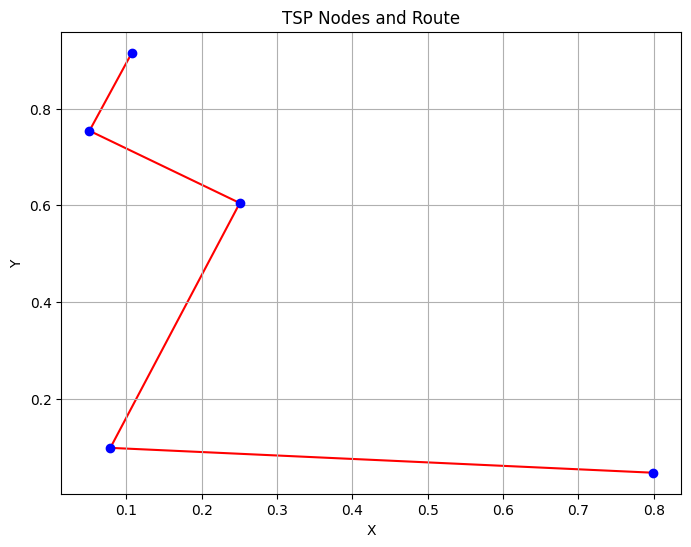

1.6780315419522702


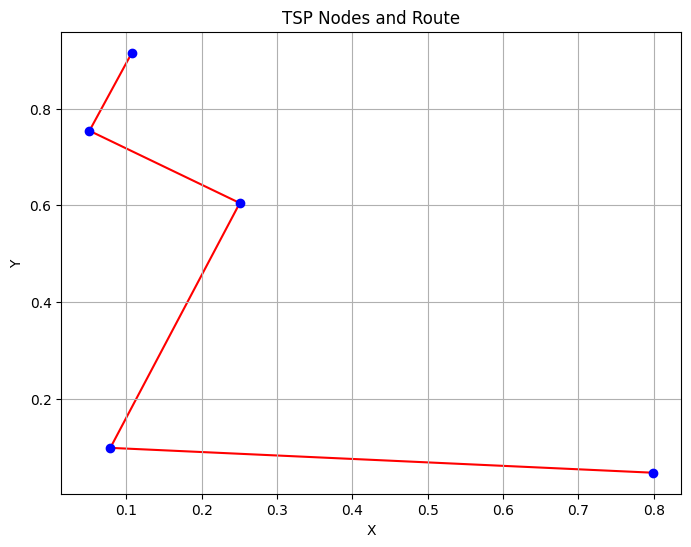

1.6780315419522702


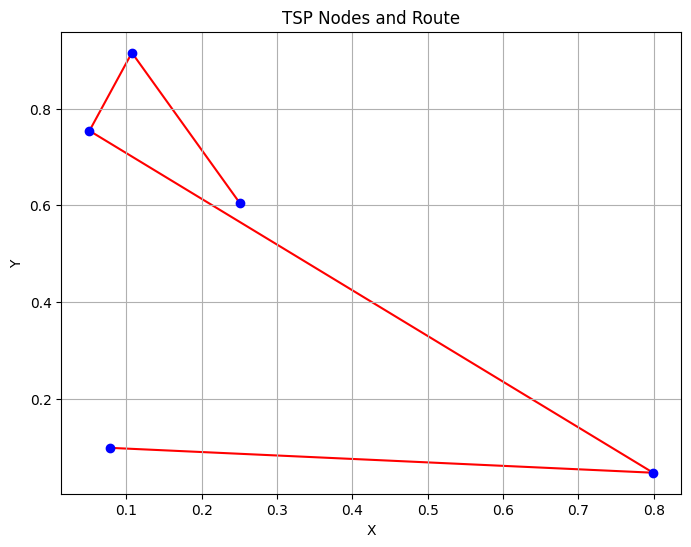

In [57]:

# Create a hybrid population combining Hill Climbing and random solutions
def create_hybrid_population(pop_size, num_cities, percentage_hill_climbing):
    num_hill_climbing = int(pop_size * percentage_hill_climbing)
    num_random = pop_size - num_hill_climbing

    # Generate the population using Hill Climbing
    population_hill_climbing = create_initial_population_hill_climbing(num_hill_climbing, num_cities)

    #  Generate the population using random solutions
    population_random = create_initial_population(num_random, num_cities)

    # Combine the two populations into a single hybrid population
    hybrid_population = population_hill_climbing + population_random
    return hybrid_population

#visualize and evaluate a few solutions
populationhyb = create_hybrid_population(pop_size, N, 0.5)
print(populationhyb, "\n\n")
plot_tsp(cities, populationhyb[0])
print(fitness(populationhyb[0]))
plot_tsp(cities, populationhyb[2])
print(fitness(populationhyb[2]))
plot_tsp(cities, populationhyb[4])

# Selection

In [64]:
# Selection: Roulette Wheel Selection for maximization
def roulete_wheel_selection(population, all_fitness):
    total_fitness = sum(all_fitness)
    selection_probs = [f / total_fitness for f in all_fitness]  # it works for maximization
    return population[np.random.choice(len(population), p=selection_probs)]

# obtiene el fitness para cada inviduo
print("Population size:", len(population))
print("Num. cities:", N)
print(population)
print(all_fitness, "\n")

print("SELECTED IN MAXIMIZATION")
selected =  roulete_wheel_selection(population, all_fitness)
print("selected:", selected, fitness(selected), "\n")


Population size: 8
Num. cities: 5
[[3, 2, 0, 4, 1], [3, 0, 4, 1, 2], [4, 1, 3, 0, 2], [0, 3, 1, 4, 2], [0, 1, 3, 4, 2], [4, 1, 2, 3, 0], [1, 0, 2, 4, 3], [4, 2, 3, 0, 1]]
[2.0788411231345485, 2.645850355395019, 2.5397678423134145, 2.6180906916048343, 2.57303762857898, 3.3333434733010545, 2.021771946262679, 3.2091107364914517] 

SELECTED IN MAXIMIZATION
selected: [4, 1, 2, 3, 0] 3.3333434733010545 



In [65]:
# Selection: Roulette Wheel Selection for minimization
all_fitness = [ fitness(sol) for sol in population]


def roulete_wheel_selection_minimization(population, all_fitness):
    max_fitness = max(all_fitness)
    inverted_fitness = [max_fitness - f for f in all_fitness]  # invert fitness
    total_fitness = sum(inverted_fitness)
    selection_probs = [f / total_fitness for f in inverted_fitness]
    return population[np.random.choice(len(population), p=selection_probs)]

print("SELECTED IN MINIMIZATION")
selected =  roulete_wheel_selection_minimization(population, all_fitness)
print("selected:", selected, fitness(selected), "\n")




SELECTED IN MINIMIZATION
selected: [4, 1, 3, 0, 2] 2.5397678423134145 



In [66]:
def rank_based_selection(population, all_fitness):
    # Ordenar la población y los fitness de menor a mayor (porque es minimización)
    sorted_indices = np.argsort(all_fitness)
    sorted_population = [population[i] for i in sorted_indices]
    ranks = np.arange(1, len(population) + 1)  # Asignar rangos del 1 al N

    # Calcular probabilidades de selección inversamente proporcionales al rango
    total_rank = sum(ranks)
    selection_probs = [ (len(population) - rank + 1) / total_rank for rank in ranks ]

    # Seleccionar un individuo basado en las probabilidades de selección
    selected_index = np.random.choice(len(population), p=selection_probs)
    selected_individual = sorted_population[selected_index]

    return selected_individual




In [67]:
print("SELECTED IN MINIMIZATION")
selectedrank =  rank_based_selection(population, all_fitness)
print("selected:", selectedrank, fitness(selectedrank), "\n")

SELECTED IN MINIMIZATION
selected: [3, 2, 0, 4, 1] 2.0788411231345485 



In [68]:
def fitness_scaling_selection(population, all_fitness):
    # Escalamiento de fitness: Puedes usar escalamiento lineal simple
    max_fitness = max(all_fitness)
    min_fitness = min(all_fitness)

    # Evitar división por cero
    if max_fitness == min_fitness:
        scaled_fitness = [1] * len(all_fitness)
    else:
        scaled_fitness = [ (max_fitness - f) / (max_fitness - min_fitness) for f in all_fitness ]

    total_scaled_fitness = sum(scaled_fitness)
    selection_probs = [ f / total_scaled_fitness for f in scaled_fitness ]

    # Seleccionar un individuo basado en las probabilidades de selección
    selected_index = np.random.choice(len(population), p=selection_probs)
    selected_individual = population[selected_index]

    return selected_individual

In [69]:
selected = fitness_scaling_selection(population, all_fitness)
print("Selected via Fitness Scaling Selection:", selected, fitness(selected), "\n")

Selected via Fitness Scaling Selection: [0, 3, 1, 4, 2] 2.6180906916048343 



In [70]:
def tournament_selection(population, all_fitness, tournament_size=5):
    # Seleccionar aleatoriamente 'tournament_size' individuos
    tournament_indices = np.random.choice(len(population), size=tournament_size, replace=False)
    tournament_individuals = [population[i] for i in tournament_indices]
    tournament_fitness = [all_fitness[i] for i in tournament_indices]

    # Encontrar el individuo con el mejor fitness en el torneo
    best_index = np.argmin(tournament_fitness)  # Minimización
    selected_individual = tournament_individuals[best_index]

    return selected_individual

In [71]:
selected = tournament_selection(population, all_fitness, tournament_size=5)
print("Selected via Tournament Selection:", selected, fitness(selected), "\n")

Selected via Tournament Selection: [1, 0, 2, 4, 3] 2.021771946262679 



#Crossover

Single point crossover

In [72]:
def single_point_crossover(parent1, parent2):
    """
    Parameters:
    parent1 (list): The first parent.
    parent2 (list): The second parent.

    Returns:
    offspring1, offspring2: Two offspring produced by the crossover.
    """
    # Choose a crossover point
    crossover_point = random.randint(1, len(parent1) - 1)

    # Create offspring by combining parts of the parents
    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent1[crossover_point:]

    return offspring1, offspring2

offspring1, offspring2 = single_point_crossover(population[0], population[1])
print("Parents:", population[0], population[1])
print("Offspring:", offspring1, offspring2)

Parents: [3, 2, 0, 4, 1] [3, 0, 4, 1, 2]
Offspring: [3, 2, 4, 1, 2] [3, 0, 0, 4, 1]


Ordered crossover

In [73]:
def fill_child(child, parent, end):
    size = len(parent)
    current_pos = (end + 1) % size
    for gene in parent:
        if gene not in child:
            child[current_pos] = gene
            current_pos = (current_pos + 1) % size

def ordered_crossover(parent1, parent2):
    size = len(parent1)
    child1, child2 = [-1]*size, [-1]*size # crea los hijos llenos de -1 al principio

    start, end = sorted(random.sample(range(size), 2))
    child1[start:end+1] = parent2[start:end+1]
    child2[start:end+1] = parent1[start:end+1]

    fill_child(child1, parent1, end)
    fill_child(child2, parent2, end)

    return child1, child2

offspring1, offspring2 = ordered_crossover(population[0], population[1])
print("Parents:", population[0], population[1])
print("Offspring:", offspring1, offspring2)

Parents: [3, 2, 0, 4, 1] [3, 0, 4, 1, 2]
Offspring: [3, 0, 4, 2, 1] [3, 2, 0, 4, 1]


# Mutation

Swap mutation

In [74]:
def swap_mutate(individual):
  i, j = np.random.choice(len(individual), 2, replace=False) # two random indices
  new_individual = individual.copy()
  new_individual[i], new_individual[j] = individual[j], individual[i]
  return new_individual

mutated = swap_mutate(population[0])
print("Original: \t", population[0])
print("Mutated: \t", mutated)

Original: 	 [3, 2, 0, 4, 1]
Mutated: 	 [3, 1, 0, 4, 2]


#Selection elite

We will select some of the previous generation

In [75]:
def select_elite(population, all_fitness, elite_size):   # selecciona los que tengan el menor fitness
  elite_indices = np.argsort(all_fitness)[:elite_size]
  return np.array(population)[elite_indices], elite_indices


all_fitness = [ fitness(sol) for sol in population]
selected_elite, indices = select_elite(population, all_fitness, 2)

print("Population:", population)
print("Fitness:", all_fitness)
print("Selected Elite:", selected_elite)
print("Selected indices:", indices)

# para imprimir con mejor vista
import pandas as pd
data = {'Population': population, 'Fitness': all_fitness}
df = pd.DataFrame(data)
print(df)

Population: [[3, 2, 0, 4, 1], [3, 0, 4, 1, 2], [4, 1, 3, 0, 2], [0, 3, 1, 4, 2], [0, 1, 3, 4, 2], [4, 1, 2, 3, 0], [1, 0, 2, 4, 3], [4, 2, 3, 0, 1]]
Fitness: [2.0788411231345485, 2.645850355395019, 2.5397678423134145, 2.6180906916048343, 2.57303762857898, 3.3333434733010545, 2.021771946262679, 3.2091107364914517]
Selected Elite: [[1 0 2 4 3]
 [3 2 0 4 1]]
Selected indices: [6 0]
        Population   Fitness
0  [3, 2, 0, 4, 1]  2.078841
1  [3, 0, 4, 1, 2]  2.645850
2  [4, 1, 3, 0, 2]  2.539768
3  [0, 3, 1, 4, 2]  2.618091
4  [0, 1, 3, 4, 2]  2.573038
5  [4, 1, 2, 3, 0]  3.333343
6  [1, 0, 2, 4, 3]  2.021772
7  [4, 2, 3, 0, 1]  3.209111


#Integration

Generation 0 | Best distance: 19.815481345232055
Generation 50 | Best distance: 11.75597500678015
Generation 100 | Best distance: 10.05029681061406
Generation 150 | Best distance: 8.611542128351534
Generation 200 | Best distance: 7.865174900679505
Generation 250 | Best distance: 7.469754793109155
Generation 300 | Best distance: 7.452736203464675
Generation 350 | Best distance: 7.1068967218681545
Generation 400 | Best distance: 6.843740564448323
Generation 450 | Best distance: 6.824506755250012
Generation 500 | Best distance: 6.559448532013739
Generation 550 | Best distance: 6.557908903383105
Generation 600 | Best distance: 6.466356220346409
Generation 650 | Best distance: 6.466356220346409
Generation 700 | Best distance: 6.466356220346409
Generation 750 | Best distance: 6.405375615105656
Generation 800 | Best distance: 6.353983381739053
Generation 850 | Best distance: 6.293021705085101
Generation 900 | Best distance: 6.28932195335371
Generation 950 | Best distance: 6.123591000520278
Ge

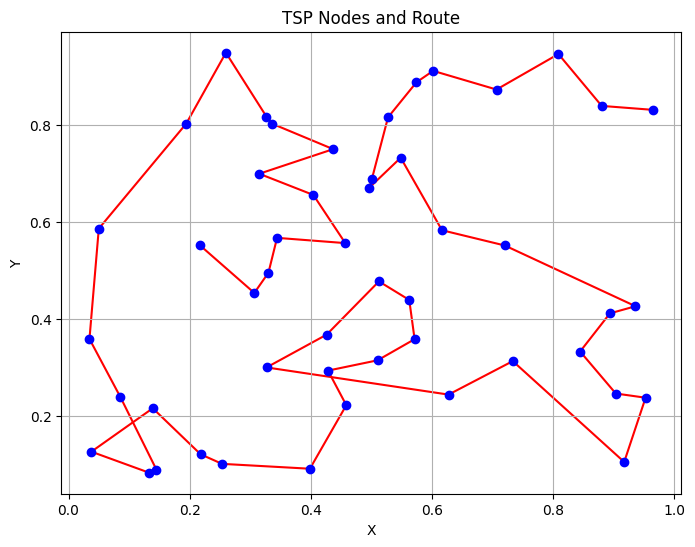

In [42]:
history = []

# Genetic Algorithm
def genetic_algorithm(distance_matrix, mutation_rate, generations):
    num_cities = distance_matrix.shape[0]
    population = create_initial_population(pop_size, N) # population size and num cities
    all_fitness = [ fitness(sol) for sol in population]

    for generation in range(generations):
        new_population = []

        # Preserve elite individuals
        selected_elite, elite_indices = select_elite(population, all_fitness, elite_size)
        new_population.extend(selected_elite)

        # Create new population through crossover and mutation
        while len(new_population) < pop_size:
            parent1 = roulete_wheel_selection_minimization(population, all_fitness)
            parent2 = roulete_wheel_selection_minimization(population, all_fitness)
            child1, child2 = ordered_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                child1 = swap_mutate(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutate(child2)

            new_population.extend([child1, child2])

        population = new_population[:pop_size] # replace with new population
        all_fitness = [ fitness(sol) for sol in population]
        if generation % 50 == 0:
          print(f"Generation {generation} | Best distance: {min(all_fitness)}")
          history.append([generation, min(all_fitness)])


    best_route_index = np.argmin(all_fitness)
    best_route = population[best_route_index]
    best_distance = all_fitness[best_route_index]

    print(f"Final best distance: {best_distance}")
    return best_route, best_distance

# hyperparametros
pop_size = 100
N = 50
elite_size = 10
mutation_rate = 0.01
generations = 5000

#pop_size = 200
#N = 100
#elite_size = 50
#mutation_rate = 0.001
#generations = 10000

cities = np.random.rand(N, 2)
distances = squareform(pdist(cities, 'euclidean'))

best_route, best_distance = genetic_algorithm(distances, mutation_rate, generations)
plot_tsp(cities, best_route)

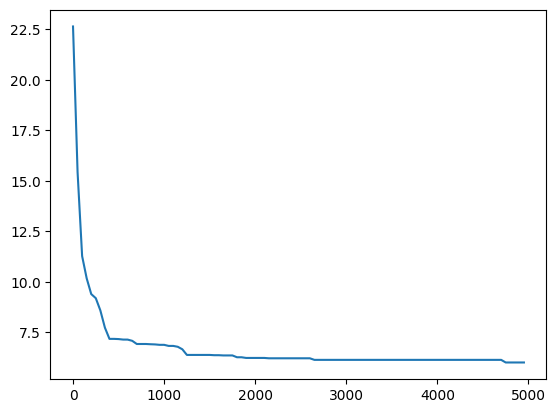

In [76]:
from matplotlib import pyplot as plt

data = np.array(history)
x = data[:, 0]
y = data[:, 1]

plt.plot(x, y)


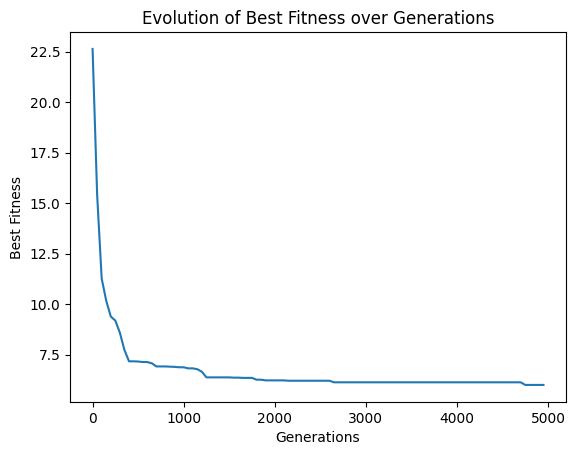

In [77]:
import matplotlib.pyplot as plt

# Extraer generaciones y mejores fitness
generations_list = [item[0] for item in history]
fitness_list = [item[1] for item in history]

# Graficar
plt.plot(generations_list, fitness_list)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.title('Evolution of Best Fitness over Generations')
plt.show()

# GA - Análisis

In [46]:
history = []

def genetic_algorithm_all(distance_matrix, mutation_rate, generations, init_function, selection_function):
    num_cities = distance_matrix.shape[0]

    # Inic popuulation
    if init_function == create_hybrid_population:
        # percentage hill climbing =0.5
        population = init_function(pop_size, num_cities, percentage_hill_climbing=0.5)
    else:
        population = init_function(pop_size, num_cities)

    all_fitness = [fitness(sol) for sol in population]

    for generation in range(generations):
        new_population = []

        # Preservar individuos élite
        selected_elite, elite_indices = select_elite(population, all_fitness, elite_size)
        new_population.extend(selected_elite)

        # Crear nueva población mediante cruzamiento y mutación
        while len(new_population) < pop_size:
            parent1 = selection_function(population, all_fitness)
            parent2 = selection_function(population, all_fitness)
            child1, child2 = ordered_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                child1 = swap_mutate(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutate(child2)

            new_population.extend([child1, child2])

        # Reemplazar con la nueva población (asegurarse de no exceder el tamaño de la población)
        population = new_population[:pop_size]
        all_fitness = [fitness(sol) for sol in population]

        if generation % 50 == 0:
            best_fitness = min(all_fitness)
            print(f"Generation {generation} | Best distance: {best_fitness}")
            history.append([generation, best_fitness])

    # Encontrar la mejor ruta al final de las generaciones
    best_route_index = np.argmin(all_fitness)
    best_route = population[best_route_index]
    best_distance = all_fitness[best_route_index]

    print(f"Final best distance: {best_distance}")
    return best_route, best_distance


Generation 0 | Best distance: 22.634908746325213
Generation 50 | Best distance: 15.425868603978065
Generation 100 | Best distance: 11.267875202618386
Generation 150 | Best distance: 10.166654270433353
Generation 200 | Best distance: 9.387630810788103
Generation 250 | Best distance: 9.184067048970249
Generation 300 | Best distance: 8.580243863261481
Generation 350 | Best distance: 7.726058891470223
Generation 400 | Best distance: 7.169961159157001
Generation 450 | Best distance: 7.169961159157001
Generation 500 | Best distance: 7.160225793740431
Generation 550 | Best distance: 7.13559819772882
Generation 600 | Best distance: 7.1339470676730805
Generation 650 | Best distance: 7.073709367464559
Generation 700 | Best distance: 6.916909066021246
Generation 750 | Best distance: 6.916909066021246
Generation 800 | Best distance: 6.916909066021246
Generation 850 | Best distance: 6.904569223091793
Generation 900 | Best distance: 6.895696781852178
Generation 950 | Best distance: 6.875217652316663

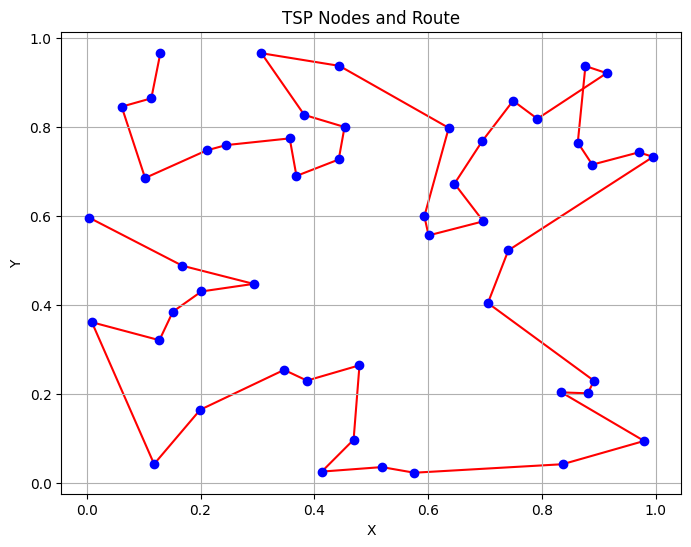

In [49]:
# hyperparametros
pop_size = 100
N = 50
elite_size = 10
mutation_rate = 0.01
generations = 5000

#pop_size = 200
#N = 100
#elite_size = 50
#mutation_rate = 0.001
#generations = 10000

cities = np.random.rand(N, 2)
distances = squareform(pdist(cities, 'euclidean'))


best_route, best_distance = genetic_algorithm_all(distances, mutation_rate, generations, init_function= create_initial_population, selection_function=roulete_wheel_selection_minimization)
plot_tsp(cities, best_route)

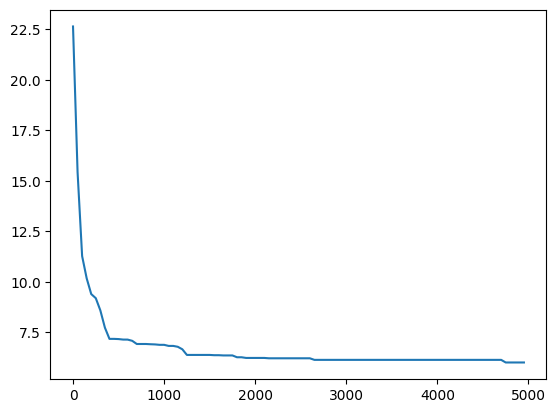

In [50]:
data = np.array(history)
x = data[:, 0]
y = data[:, 1]

plt.plot(x, y)


In [82]:
# Parámetros generales
pop_size = 100
N = 100
elite_size = 10
mutation_rate = 0.01
generations = 5000

# Generar las coordenadas de las ciudades y la matriz de distancias
cities = np.random.rand(N, 2)
distances = squareform(pdist(cities, 'euclidean'))

# Asegurarse de que la lista history esté vacía antes de cada ejecución
history = []

**Experimento 1:**

Para un mismo conjunto de 100 ciudades, implementar y comparar la soluci´on
obtenida usando los métodos de selección: Roulette wheel selection Rank-based selection, Fitness
scaling, y Tournament selection.

In [83]:
selection_functions = [
    (roulete_wheel_selection_minimization, 'Roulette Wheel Selection'),
    (rank_based_selection, 'Rank-based Selection'),
    (fitness_scaling_selection, 'Fitness Scaling Selection'),
    (tournament_selection, 'Tournament Selection')
]


histories_selection = {}

for selection_function, selection_name in selection_functions:
    print(f"\nEjecutando con {selection_name}")

    history = []

    best_route, best_distance = genetic_algorithm_all(
        distance_matrix=distances,
        mutation_rate=mutation_rate,
        generations=generations,
        init_function=create_initial_population,
        selection_function=selection_function
    )

    histories_selection[selection_name] = history.copy()



Ejecutando con Roulette Wheel Selection
Generation 0 | Best distance: 44.00845612427696
Generation 50 | Best distance: 33.414457574452435
Generation 100 | Best distance: 27.23685874862672
Generation 150 | Best distance: 24.023603156154845
Generation 200 | Best distance: 22.70578271017439
Generation 250 | Best distance: 21.177685162675132
Generation 300 | Best distance: 19.978182757781415
Generation 350 | Best distance: 18.49667819439984
Generation 400 | Best distance: 17.954701523192348
Generation 450 | Best distance: 17.5832537029994
Generation 500 | Best distance: 17.28688174283166
Generation 550 | Best distance: 16.90897128814068
Generation 600 | Best distance: 16.505287559496637
Generation 650 | Best distance: 16.23081199463713
Generation 700 | Best distance: 16.203856983449477
Generation 750 | Best distance: 16.16661740371113
Generation 800 | Best distance: 16.158230477678764
Generation 850 | Best distance: 15.82863474208412
Generation 900 | Best distance: 15.095378231430763
Gene

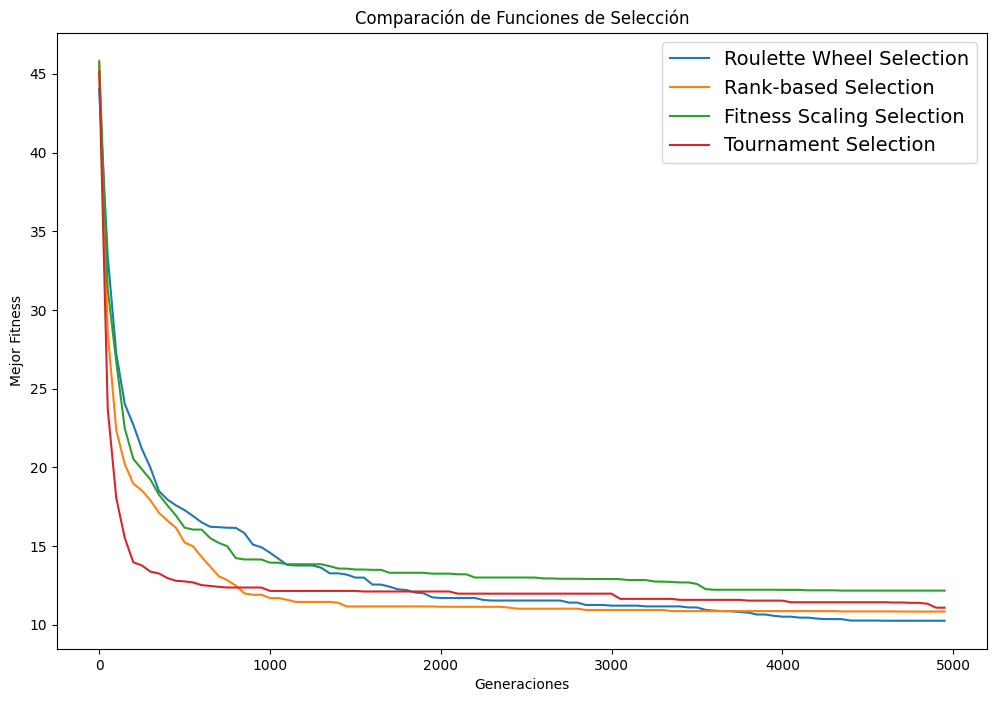

In [86]:
plt.figure(figsize=(12, 8))

for selection_name in histories_selection:
    gen = [item[0] for item in histories_selection[selection_name]]
    fit = [item[1] for item in histories_selection[selection_name]]
    plt.plot(gen, fit, label=selection_name)

plt.xlabel('Generaciones')
plt.ylabel('Mejor Fitness')
plt.title('Comparación de Funciones de Selección')
plt.legend(fontsize=14)
plt.show()

**Experimento 2:**
Para un mismo conjunto de 100 ciudades, implementar y comparar la soluci´on
obtenida usando los m´etodos inicializaci´on de poblaci´on: random, heuristic y hybrid initialization.

In [87]:
init_functions = [
    (create_initial_population, 'Random Initialization'),
    (create_initial_population_hill_climbing, 'Heuristic Initialization'),
    (create_hybrid_population, 'Hybrid Initialization')
]

histories_initialization = {}

for init_function, init_name in init_functions:
    print(f"\nEjecutando con {init_name}")

    history = []

    best_route, best_distance = genetic_algorithm_all(
        distance_matrix=distances,
        mutation_rate=mutation_rate,
        generations=generations,
        init_function=init_function,
        selection_function=roulete_wheel_selection_minimization
    )

    histories_initialization[init_name] = history.copy()



Ejecutando con Random Initialization
Generation 0 | Best distance: 45.19906928358396
Generation 50 | Best distance: 33.61280573400389
Generation 100 | Best distance: 27.265131868556026
Generation 150 | Best distance: 24.505402740815562
Generation 200 | Best distance: 22.697900267201124
Generation 250 | Best distance: 21.49622431184334
Generation 300 | Best distance: 19.942369185077816
Generation 350 | Best distance: 19.265592291015405
Generation 400 | Best distance: 18.600930032909417
Generation 450 | Best distance: 17.626597682297934
Generation 500 | Best distance: 17.37683523380316
Generation 550 | Best distance: 16.62181596957758
Generation 600 | Best distance: 15.371303713129336
Generation 650 | Best distance: 14.828278368701987
Generation 700 | Best distance: 14.104937378621065
Generation 750 | Best distance: 13.878315394689125
Generation 800 | Best distance: 13.712262296090627
Generation 850 | Best distance: 13.429959912021427
Generation 900 | Best distance: 13.294329457015149
G

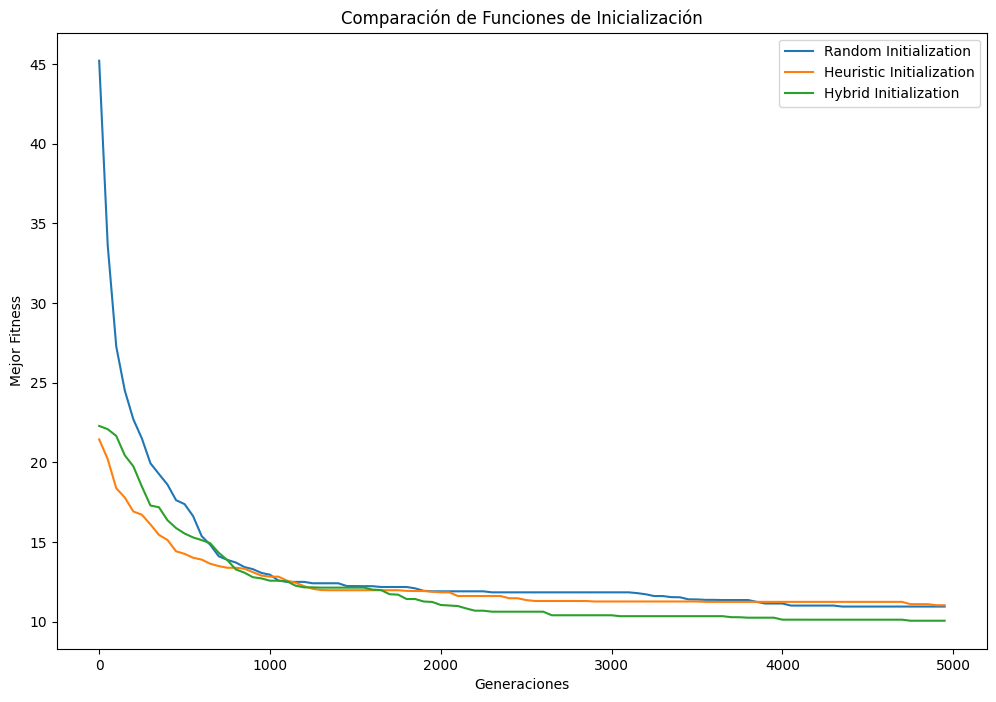

In [88]:
plt.figure(figsize=(12, 8))

for init_name in histories_initialization:
    gen = [item[0] for item in histories_initialization[init_name]]
    fit = [item[1] for item in histories_initialization[init_name]]
    plt.plot(gen, fit, label=init_name)

plt.xlabel('Generaciones')
plt.ylabel('Mejor Fitness')
plt.title('Comparación de Funciones de Inicialización')
plt.legend()
plt.show()

**Variaciones Totales**

In [89]:
# Lista de funciones de inicialización y sus nombres
init_functions = [
    (create_initial_population, 'Random Initialization'),
    (create_initial_population_hill_climbing, 'Heuristic Initialization'),
    (create_hybrid_population, 'Hybrid Initialization')
]

# Lista de funciones de selección y sus nombres
selection_functions = [
    (roulete_wheel_selection_minimization, 'Roulette Wheel Selection'),
    (rank_based_selection, 'Rank-based Selection'),
    (fitness_scaling_selection, 'Fitness Scaling Selection'),
    (tournament_selection, 'Tournament Selection')
]

# Diccionario para almacenar las historias
histories_combined = {}

# Ejecutar el algoritmo genético para todas las combinaciones
for init_function, init_name in init_functions:
    for selection_function, selection_name in selection_functions:
        print(f"\nEjecutando con {init_name} y {selection_name}")

        # Reiniciar la historia antes de cada ejecución
        history = []

        # Ejecutar el algoritmo genético
        best_route, best_distance = genetic_algorithm_all(
            distance_matrix=distances,
            mutation_rate=mutation_rate,
            generations=generations,
            init_function=init_function,
            selection_function=selection_function
        )

        # Almacenar la historia con una clave que combine ambos nombres
        key = f"{init_name} + {selection_name}"
        histories_combined[key] = history.copy()



Ejecutando con Random Initialization y Roulette Wheel Selection
Generation 0 | Best distance: 45.81008443277646
Generation 50 | Best distance: 32.04988774437729
Generation 100 | Best distance: 25.682696800026093
Generation 150 | Best distance: 23.239221846509608
Generation 200 | Best distance: 21.43210227357076
Generation 250 | Best distance: 19.40578050160997
Generation 300 | Best distance: 18.284506344814847
Generation 350 | Best distance: 16.87830755756942
Generation 400 | Best distance: 16.629551810333275
Generation 450 | Best distance: 16.392487069868245
Generation 500 | Best distance: 15.541866942638416
Generation 550 | Best distance: 15.133171571242148
Generation 600 | Best distance: 14.522531003554777
Generation 650 | Best distance: 14.323194314614543
Generation 700 | Best distance: 14.30437719605964
Generation 750 | Best distance: 14.213004738940546
Generation 800 | Best distance: 13.909862390327172
Generation 850 | Best distance: 13.735611511842333
Generation 900 | Best dist

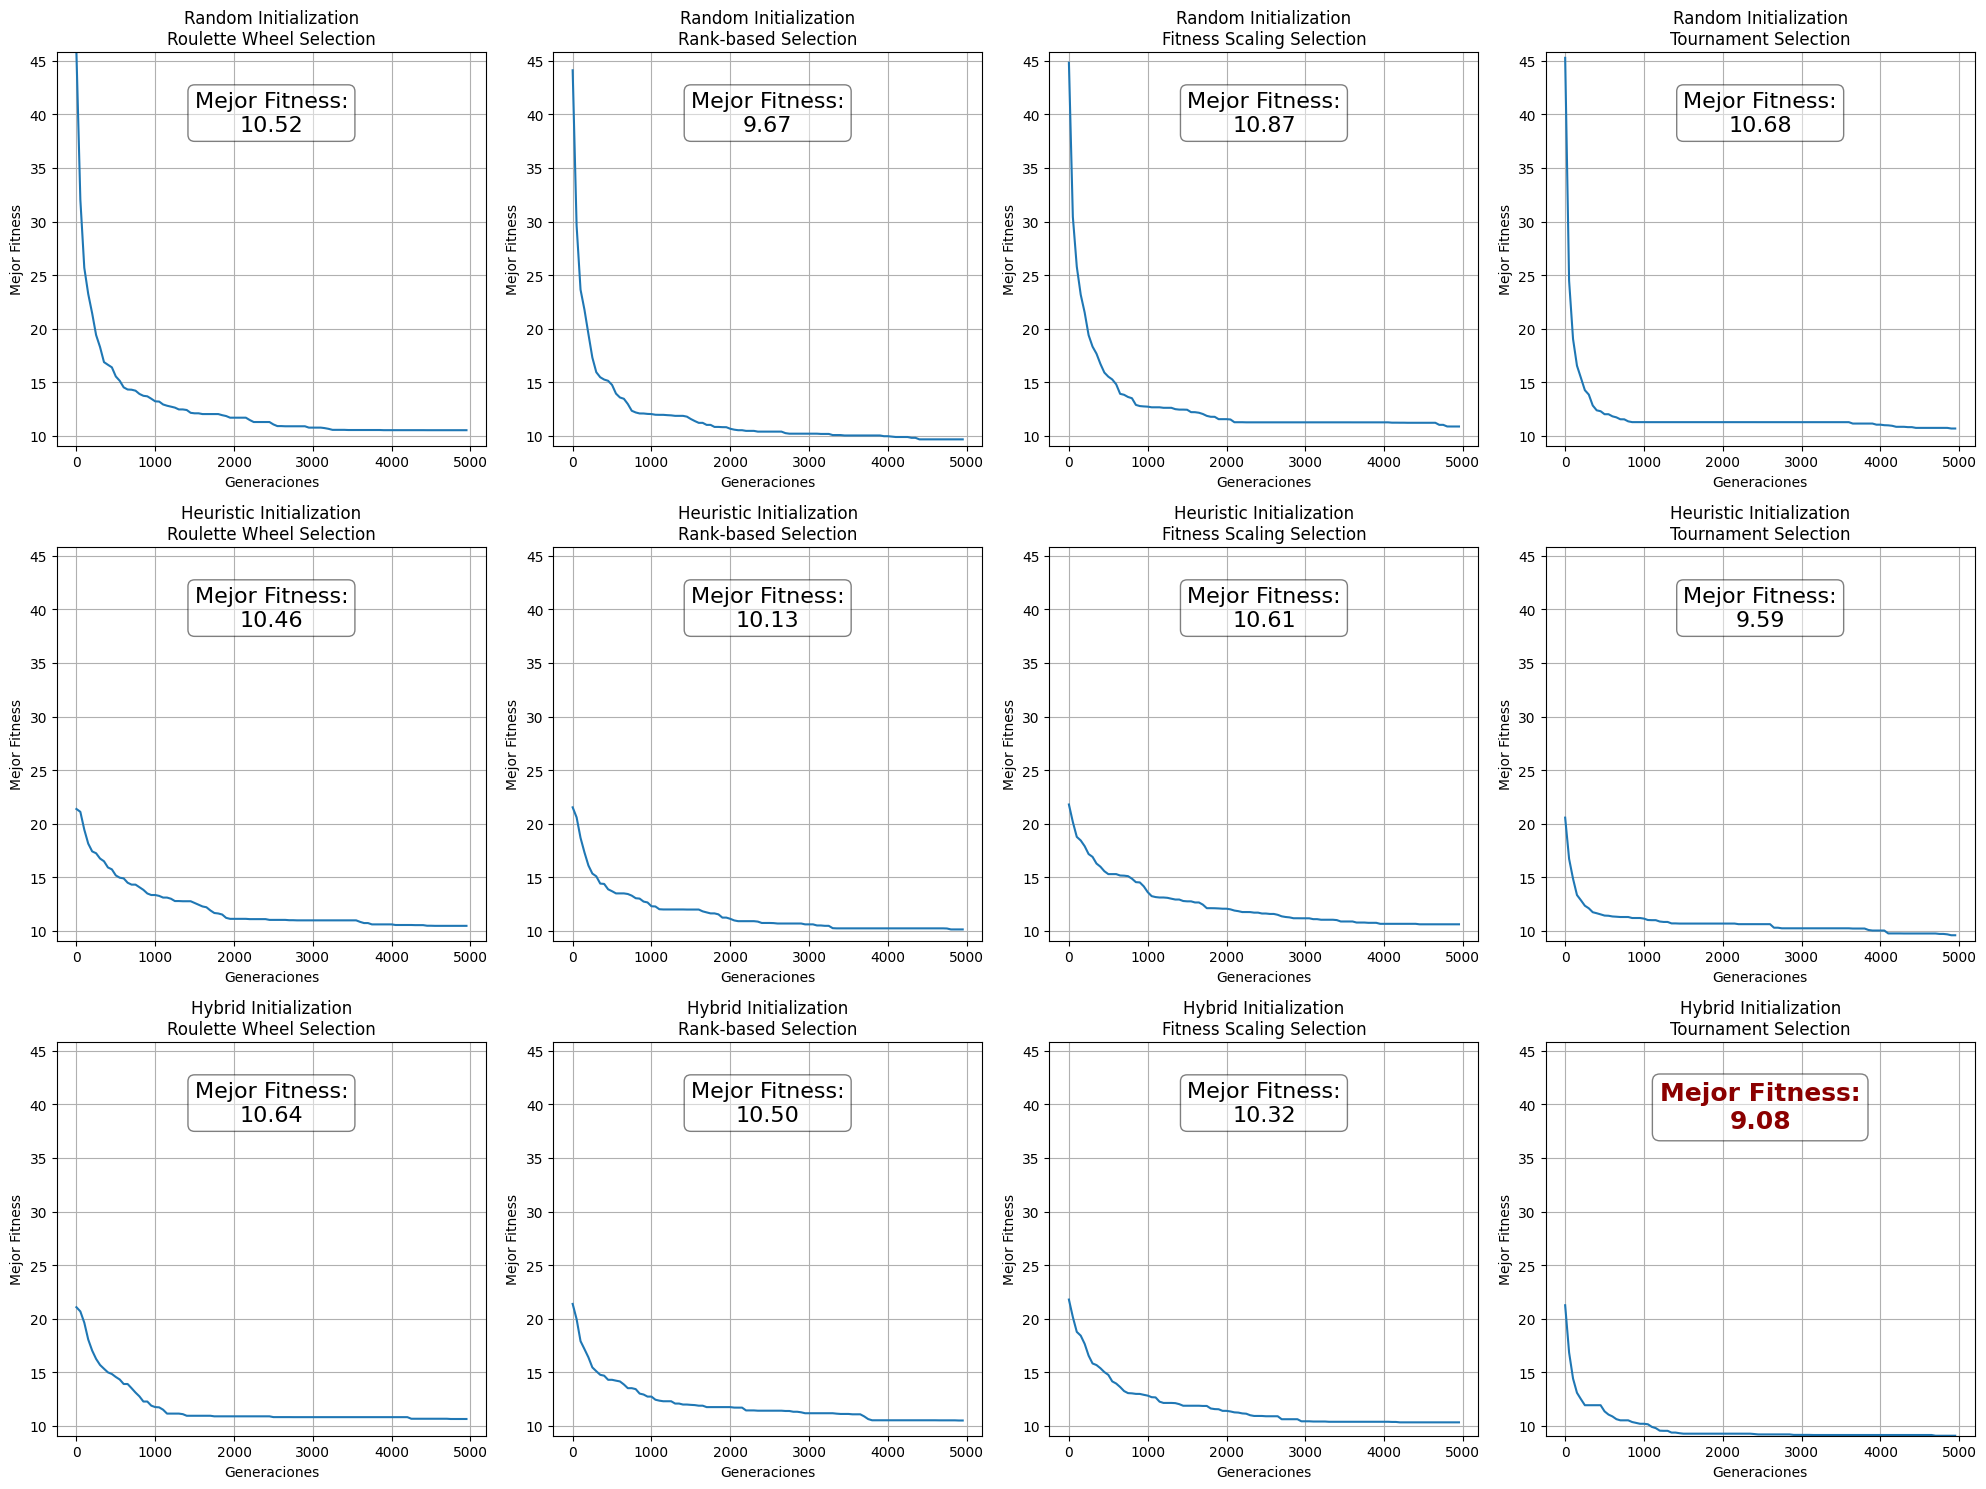

In [148]:
# Crear un diccionario para mapear nombres a índices
init_indices = {'Random Initialization': 0, 'Heuristic Initialization': 1, 'Hybrid Initialization': 2}
selection_indices = {'Roulette Wheel Selection': 0, 'Rank-based Selection': 1, 'Fitness Scaling Selection': 2, 'Tournament Selection': 3}

# Configurar la matriz de subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Establecer límites comunes para el eje Y y calcular el mejor fitness global
all_fitness_values = []
best_fitness_values = {}  # Para almacenar el mejor fitness de cada combinación

for key in histories_combined:
    fit = [item[1] for item in histories_combined[key]]
    all_fitness_values.extend(fit)
    best_fitness_values[key] = min(fit)  # Guardar el mejor fitness de esta combinación

global_min_fitness = min(all_fitness_values)
global_max_fitness = max(all_fitness_values)

# Encontrar el mejor fitness global
best_overall_fitness = min(best_fitness_values.values())

# Graficar cada combinación
for key in histories_combined:
    gen = [item[0] for item in histories_combined[key]]
    fit = [item[1] for item in histories_combined[key]]

    init_name, selection_name = key.split(' + ')
    row = init_indices[init_name]
    col = selection_indices[selection_name]

    axes[row, col].plot(gen, fit)
    axes[row, col].set_title(f"{init_name}\n{selection_name}")
    axes[row, col].set_xlabel('Generaciones')
    axes[row, col].set_ylabel('Mejor Fitness')
    axes[row, col].set_ylim(global_min_fitness, global_max_fitness)
    axes[row, col].grid(True)

    # Obtener el mejor fitness para esta combinación
    best_fitness = best_fitness_values[key]

    # Comprobar si este es el mejor fitness global
    if best_fitness == best_overall_fitness:
        # Destacar el texto con negrita y color rojo oscuro
        axes[row, col].text(0.5, 0.9, f"Mejor Fitness:\n{best_fitness:.2f}",
                            transform=axes[row, col].transAxes,
                            fontsize=18, fontweight='bold', color='darkred',
                            verticalalignment='top', horizontalalignment='center',
                            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    else:
        # Texto normal para las demás combinaciones
        axes[row, col].text(0.5, 0.9, f"Mejor Fitness:\n{best_fitness:.2f}",
                            transform=axes[row, col].transAxes,
                            fontsize=16,
                            verticalalignment='top', horizontalalignment='center',
                            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


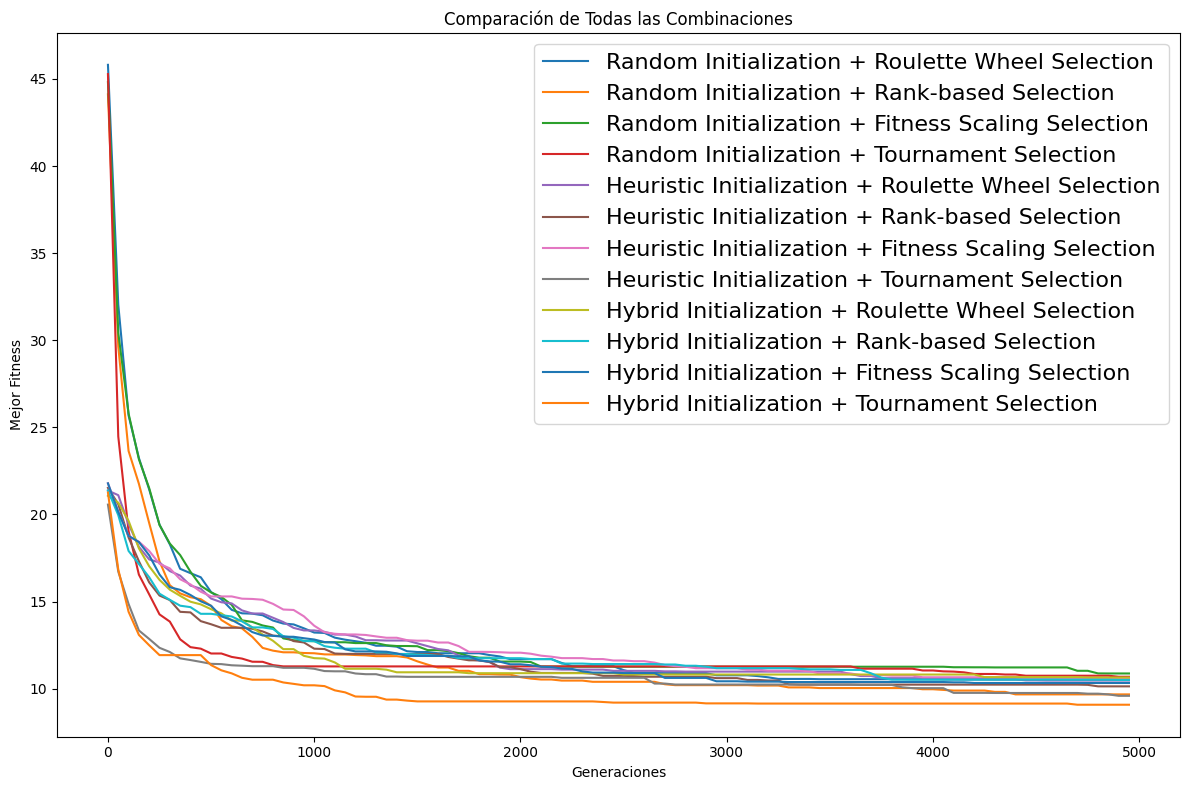

In [93]:
#
plt.figure(figsize=(12, 8))

for key in histories_combined:
    gen = [item[0] for item in histories_combined[key]]
    fit = [item[1] for item in histories_combined[key]]
    plt.plot(gen, fit, label=key)

plt.xlabel('Generaciones')
plt.ylabel('Mejor Fitness')
plt.title('Comparación de Todas las Combinaciones')
plt.legend(fontsize16)
plt.tight_layout()
plt.show()


In [103]:
# Seleccionar cada N generaciones para muestrear
sample_interval = 100  # Cambia este valor según tus necesidades

# Crear una lista para almacenar los datos
table_rows = []

# Crear una lista de generaciones muestreadas
sampled_generations = list(range(0, generations+1, sample_interval))

# Organizar los datos
for gen in sampled_generations:
    row = {'Generation': gen}
    for init_name in init_methods:
        for selection_name in selection_methods:
            key = f"{init_name} + {selection_name}"
            if key in histories_combined:
                history = histories_combined[key]
                # Buscar el fitness en la generación actual
                fitness_values = [item[1] for item in history if item[0] == gen]
                if fitness_values:
                    fitness_at_gen = fitness_values[0]
                else:
                    # Si no hay datos exactos para la generación, puedes interpolar o dejarlo en blanco
                    fitness_at_gen = None
                column_name = f"{init_name} + {selection_name}"
                row[column_name] = fitness_at_gen
            else:
                row[column_name] = None
    table_rows.append(row)

# Crear el DataFrame
df = pd.DataFrame(table_rows)

# Mostrar la tabla
pd.set_option('display.max_columns', None)  # Para mostrar todas las columnas
print(df)


    Generation  Random Initialization + Roulette Wheel Selection  \
0            0                                         45.810084   
1          100                                         25.682697   
2          200                                         21.432102   
3          300                                         18.284506   
4          400                                         16.629552   
5          500                                         15.541867   
6          600                                         14.522531   
7          700                                         14.304377   
8          800                                         13.909862   
9          900                                         13.686782   
10        1000                                         13.219810   
11        1100                                         12.926119   
12        1200                                         12.722686   
13        1300                                  

In [104]:
pip install openpyxl

In [105]:
df.to_csv('fitness_data.csv', index=False)

print("¡Datos guardados exitosamente en 'fitness_data.csv'!")

¡Datos guardados exitosamente en 'fitness_data.csv'!


# GA vs Hill Climbing vs Simulated Annealing

In [149]:
def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range(i + 1, len(sol)):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)

  return neighbors

def hill_climbing(sol):
  while True:
    #print("iteration:", sol)
    neighbors = get_neighbors(sol)
    best_neighbor = min(neighbors, key=fitness)

    if fitness(best_neighbor) < fitness(sol):
      sol = best_neighbor
    else:
      return sol

def random_neighbor(sol):
  i, j = np.random.choice(len(sol), 2, replace=False) # two random indices
  new_sol = sol.copy()
  new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
  return new_sol

def accept(delta, T):
  if delta < 0:
    return True
  else:
    r = np.random.rand() # random value between [0, 1]
    if r < np.exp(-delta/T):
      return True
    else:
      return False

def simulated_annealing(T_max, T_min, cooling_rate):
  T = T_max
  x = initial_solution.copy()
  E = fitness(x)

  print("temperatura:", T)
  print("x", x)
  print("E", E, "\n")


  while (T > T_min) :
    x_new = random_neighbor(x)
    E_new = fitness(x_new)
    delta = E_new - E
    #print("iteration, T:", T, " delta:", delta)
    if accept(delta, T):
      x = x_new
      E = E_new

    T = T*cooling_rate

  return x

temperatura: 1000
x [37 29 80 56 17 74 55 32 24 40 94 73 42 79 58 65 11 83 84 43 88 45 33 98
 10 91 30 18 66 28  9 35 54 20 60 38 62 34 97  7  1 52 82 59 77  4 23 89
 92  3 75 36 13 41 95 90  0 72 16 46 25 31  2 15 21 63 61  5 67 19 39 47
 53 14  6 69 70 12 87 26 44 81 78 48 57 51 50 96 49 86 93 27 76 85 64 22
  8 68 71 99]
E 48.813816413304146 

Hill Climbing distance 14.231344773354824
Simulated Annealing distance 12.434896752313483


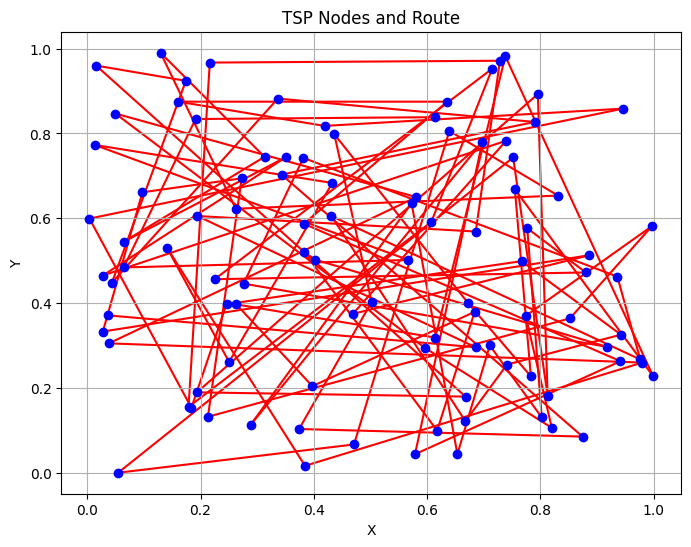

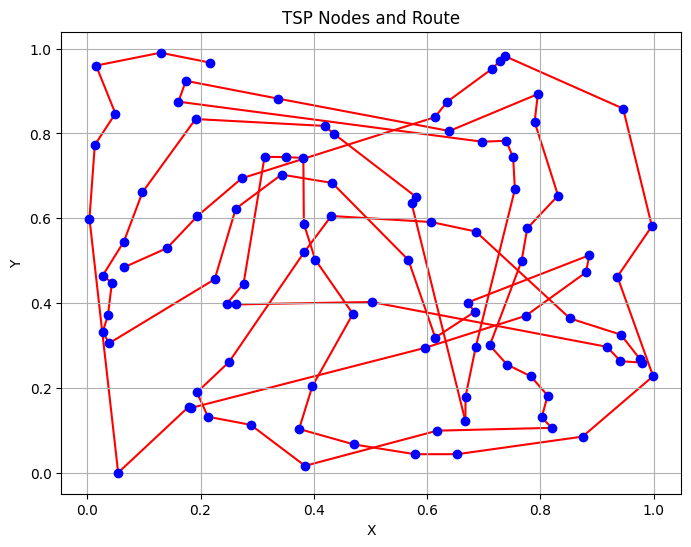

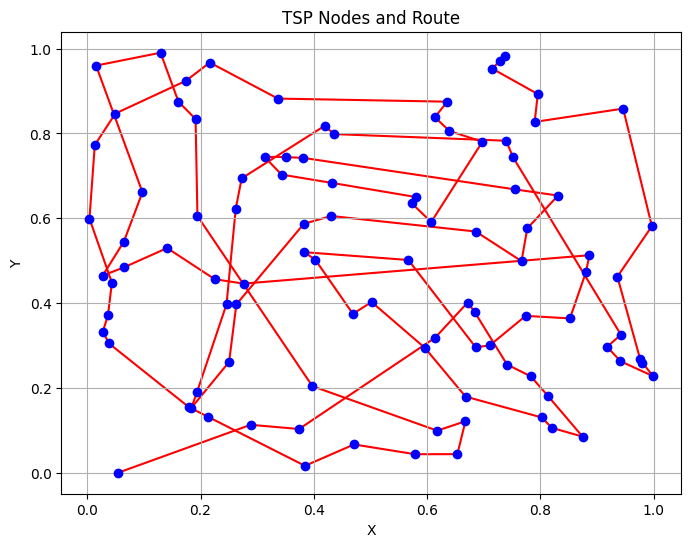

In [150]:
T_max = 1000
T_min = 0.000001
cooling_rate = 0.9999

# initial solution
initial_solution = np.array(list(range(N)))
np.random.shuffle(initial_solution)

sol1 = hill_climbing(initial_solution)
sol2 = simulated_annealing(T_max, T_min, cooling_rate)

print("Hill Climbing distance", fitness(sol1))
print("Simulated Annealing distance", fitness(sol2))

plot_tsp(cities, initial_solution)
plot_tsp(cities, sol1)
plot_tsp(cities, sol2)